In [7]:
import warnings
warnings.filterwarnings("ignore")

## importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score  ## will explian below about R^2

import statsmodels.api as sm          ## will explian below about statsmodels package

In [2]:
car_data=pd.read_csv("CarPrice_Regression.csv")

car_data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_data.shape

(205, 26)

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
# checking any null value
car_data.isnull().count()
# no missing value

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

In [9]:
# summary of the data
car_data.describe()
# as observed price column might have outlier 
#will check in box plot in later

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
## Target feature analysis

car_data.price.describe()
#Here mean and median of price are significant diferrence
# Large standard deviation indicates that there is considerable variance in the prices of the automobiles.

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

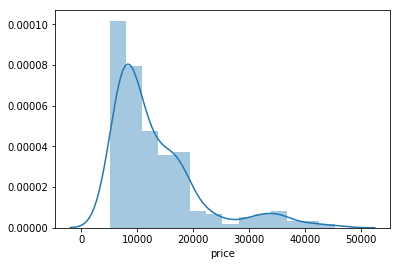

In [5]:
sns.distplot(car_data['price'])
# Price values are right-skewed, most cars are priced at the lower end (9000) of the price range.

In [13]:
# checking the column Type-is there any categorical column there or not
print ("Symboling data -",car_data.symboling.unique())
print ("fueltype data -",car_data.fueltype.unique())
print ("aspiration data -",car_data.aspiration.unique())
print ("doornumber data -",car_data.doornumber.unique())
print ("carbody data -",car_data.carbody.unique())
print ("drivewheel data -",car_data.drivewheel.unique())
print ("enginelocation data -",car_data.enginelocation.unique())
print ("enginetype data -",car_data.enginetype.unique())
print ("cylindernumber data -",car_data.cylindernumber.unique())
print ("fuelsystem data -",car_data.fuelsystem.unique())

# it signifies all the above features are categorical

Symboling data - [ 3  1  2  0 -1 -2]
fueltype data - ['gas' 'diesel']
aspiration data - ['std' 'turbo']
doornumber data - ['two' 'four']
carbody data - ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel data - ['rwd' 'fwd' '4wd']
enginelocation data - ['front' 'rear']
enginetype data - ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber data - ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem data - ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [16]:
# car_id and carname columns doesnot require here, so dropping these 2 columns
car_data.drop(["car_ID","CarName"],axis=1,inplace=True)

In [17]:
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


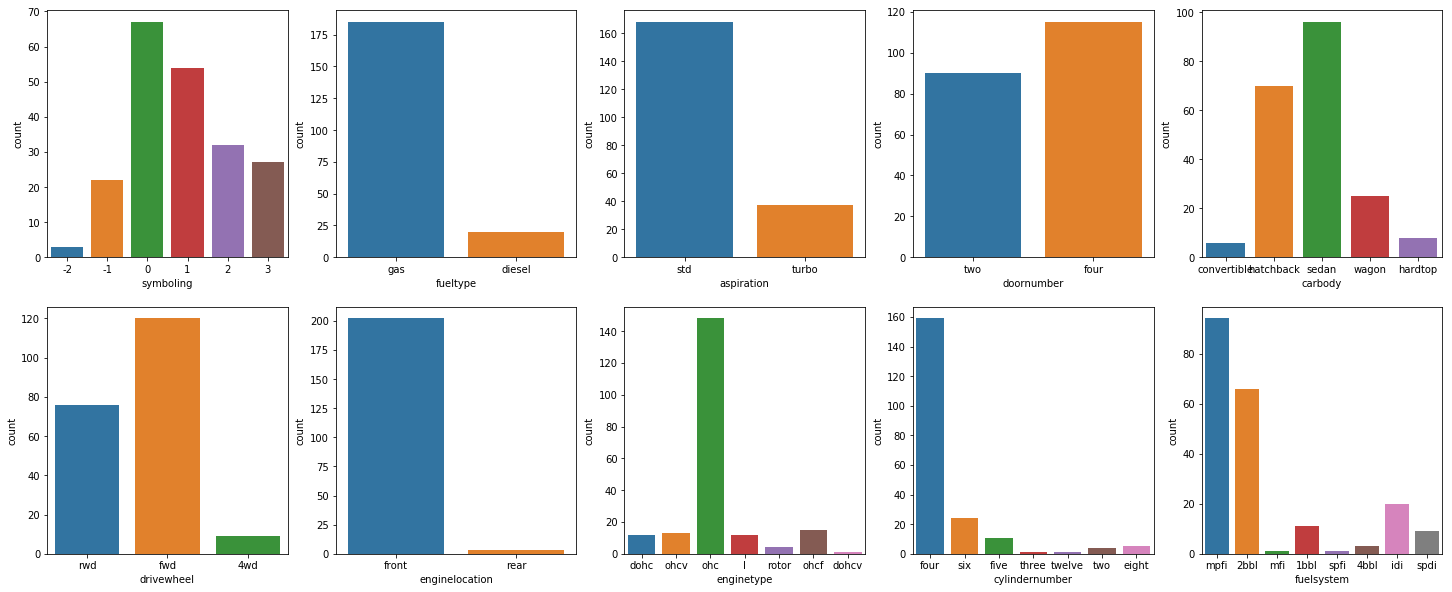

In [26]:
# categorical features bar chart
fig,ax=plt.subplots(2,5,figsize=(25,10))

sns.countplot(car_data['symboling'],ax=ax[0][0])
sns.countplot(car_data['fueltype'],ax=ax[0][1])
sns.countplot(car_data['aspiration'],ax=ax[0][2])
sns.countplot(car_data['doornumber'],ax=ax[0][3])
sns.countplot(car_data['carbody'],ax=ax[0][4])

sns.countplot(car_data['drivewheel'],ax=ax[1][0])
sns.countplot(car_data['enginelocation'],ax=ax[1][1])
sns.countplot(car_data['enginetype'],ax=ax[1][2])
sns.countplot(car_data['cylindernumber'],ax=ax[1][3])
sns.countplot(car_data['fuelsystem'],ax=ax[1][4])


# here we can merge cylynder number "three","two" column value in to a single vale as the count is very low

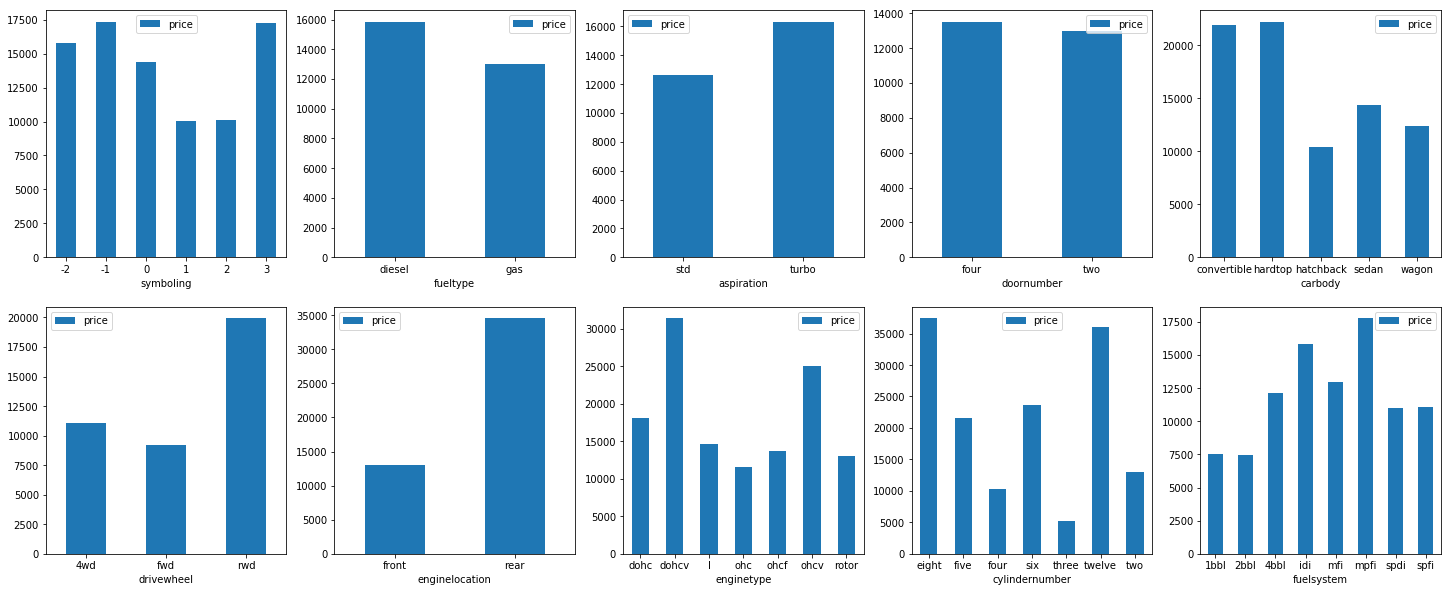

In [33]:
fig,ax1=plt.subplots(2,5,figsize=(25,10))

#ax = car_data[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
ax = car_data[['symboling','price']].groupby("symboling").mean().plot(kind = 'bar',ax=ax1[0,0],rot = 0)
ax = car_data[['fueltype','price']].groupby("fueltype").mean().plot(kind = 'bar',ax=ax1[0,1],rot = 0)
ax = car_data[['aspiration','price']].groupby("aspiration").mean().plot(kind = 'bar',ax=ax1[0,2],rot = 0)
ax = car_data[['doornumber','price']].groupby("doornumber").mean().plot(kind = 'bar',ax=ax1[0,3],rot = 0)
ax = car_data[['carbody','price']].groupby("carbody").mean().plot(kind = 'bar',ax=ax1[0,4],rot = 0)

ax = car_data[['drivewheel','price']].groupby("drivewheel").mean().plot(kind = 'bar',ax=ax1[1,0],rot = 0)
ax = car_data[['enginelocation','price']].groupby("enginelocation").mean().plot(kind = 'bar',ax=ax1[1,1],rot = 0)
ax = car_data[['enginetype','price']].groupby("enginetype").mean().plot(kind = 'bar',ax=ax1[1,2],rot = 0)
ax = car_data[['cylindernumber','price']].groupby("cylindernumber").mean().plot(kind = 'bar',ax=ax1[1,3],rot = 0)
ax = car_data[['fuelsystem','price']].groupby("fuelsystem").mean().plot(kind = 'bar',ax=ax1[1,4],rot = 0)

# here it's clear that number of doornumber doesn't much impact on price

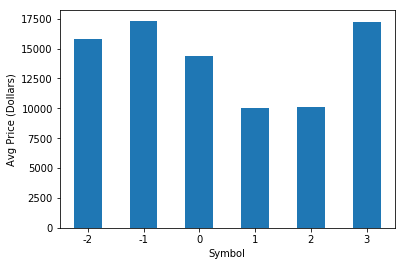

In [10]:
plt1 = car_data[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

# Inference
# More than 50% of cars are with symbol 0 or 1.(from count plot)
# Average price of car is lower for 0,1 & 2 symbol category.

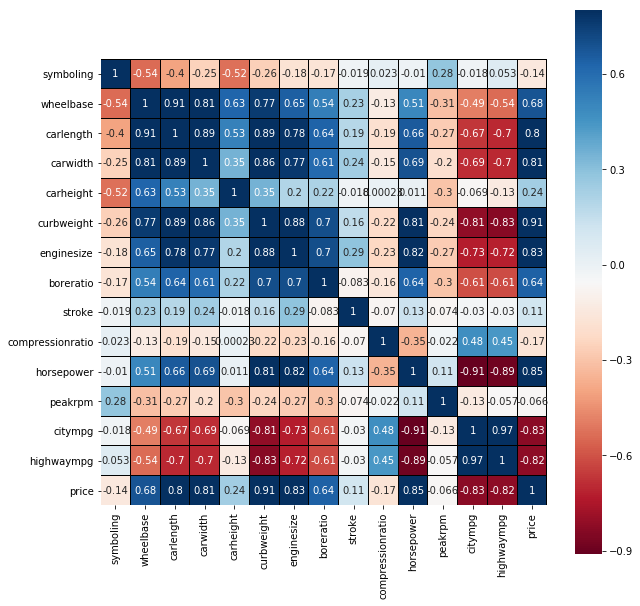

In [38]:
# Correlation
corr=car_data.corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='RdBu',linecolor='black')
# here Carlength and Wheelbase are high posotive correlation 0.91, so that this model having multicollinearity.#
# High correlation - carwidth-carlength,curveweight-carlength etc


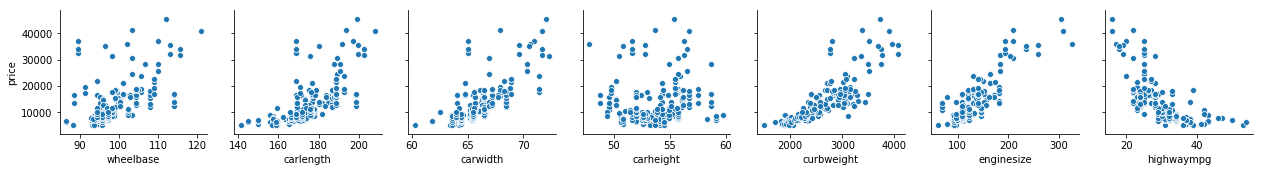

In [41]:
# Now visualise in pair plot for all numerical value distribution in KDE
sns.pairplot(car_data,x_vars=['wheelbase','carlength','carwidth','carheight','curbweight',
                              'enginesize','highwaympg'],y_vars=['price'])

# here car height doen't have muct impact on price of the car
# highwaympg and citympg have negatice correlation on price

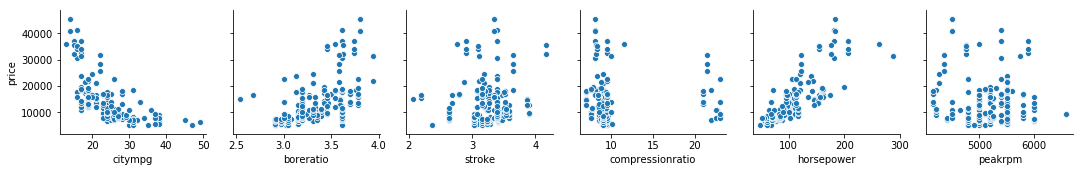

In [34]:
sns.pairplot(car_data,x_vars=['citympg','boreratio','stroke','compressionratio','horsepower','peakrpm'],y_vars=['price'])

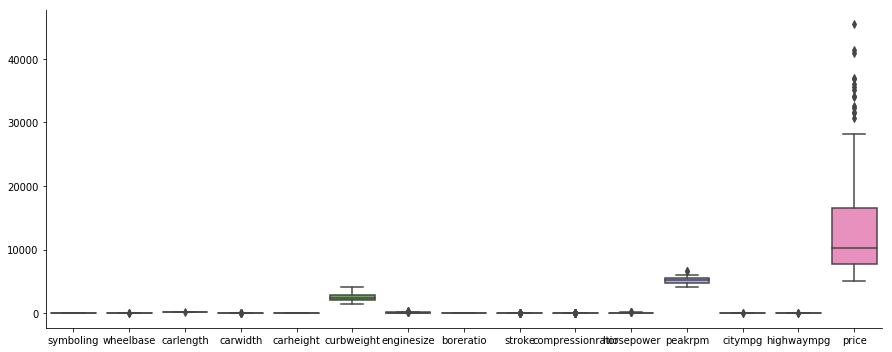

In [48]:
# Above graphical representation we can see the data having outlier
# Univariate Analysis
# Construct box plot
sns.catplot(data=car_data, kind='box',height=5, aspect=2.5)
# to check the outlier and symmetry how the data is distributed

In [ ]:
# Now as per analysis the follwoing categorical and numerical features have been consider
# Those are most important variable to predict price
 
#'symboling','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'

#'wheelbase','carlength','carwidth','curbweight','enginesize','highwaympg', 'citympg','boreratio','horsepower','peakrpm','price'

In [30]:
#--list down features based on type
numeric_feature_names = ['wheelbase','carlength','carwidth','curbweight','enginesize','highwaympg', 'citympg','boreratio','horsepower','peakrpm','price']
categoricial_feature_names = ['symboling','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'] 

copy_car_data=car_data

In [31]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


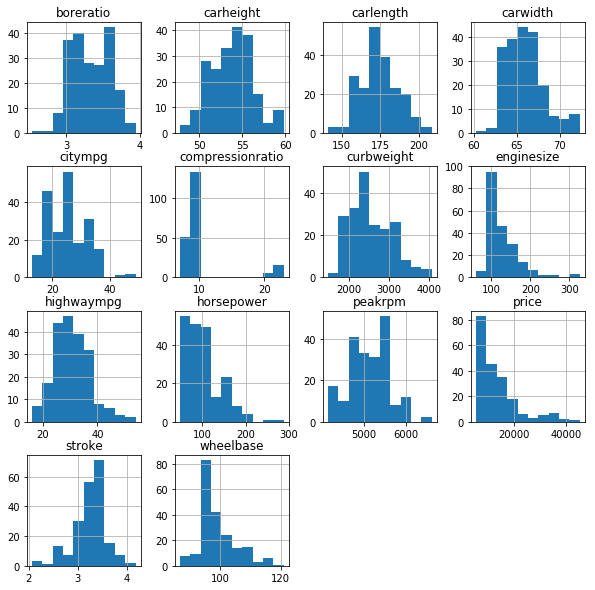

In [32]:
car_data[numeric_feature_names].hist(figsize=(10,10));

In [36]:
auto_data=car_data[['wheelbase','carlength','carwidth','curbweight','enginesize','highwaympg', 'citympg','boreratio','horsepower','peakrpm','price','symboling','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']]
auto_data.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,highwaympg,citympg,boreratio,horsepower,peakrpm,price,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,88.6,168.8,64.1,2548,130,27,21,3.47,111,5000,13495.0,3,gas,std,convertible,rwd,front,dohc,four,mpfi
1,88.6,168.8,64.1,2548,130,27,21,3.47,111,5000,16500.0,3,gas,std,convertible,rwd,front,dohc,four,mpfi
2,94.5,171.2,65.5,2823,152,26,19,2.68,154,5000,16500.0,1,gas,std,hatchback,rwd,front,ohcv,six,mpfi
3,99.8,176.6,66.2,2337,109,30,24,3.19,102,5500,13950.0,2,gas,std,sedan,fwd,front,ohc,four,mpfi
4,99.4,176.6,66.4,2824,136,22,18,3.19,115,5500,17450.0,2,gas,std,sedan,4wd,front,ohc,five,mpfi


In [48]:
numeric_feature_update_names = ['wheelbase','carlength','carwidth','curbweight','enginesize','highwaympg', 'citympg','boreratio','horsepower','peakrpm','price']
categoricial_feature_update_names = ['symboling','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'] 


<Figure size 1080x1080 with 0 Axes>

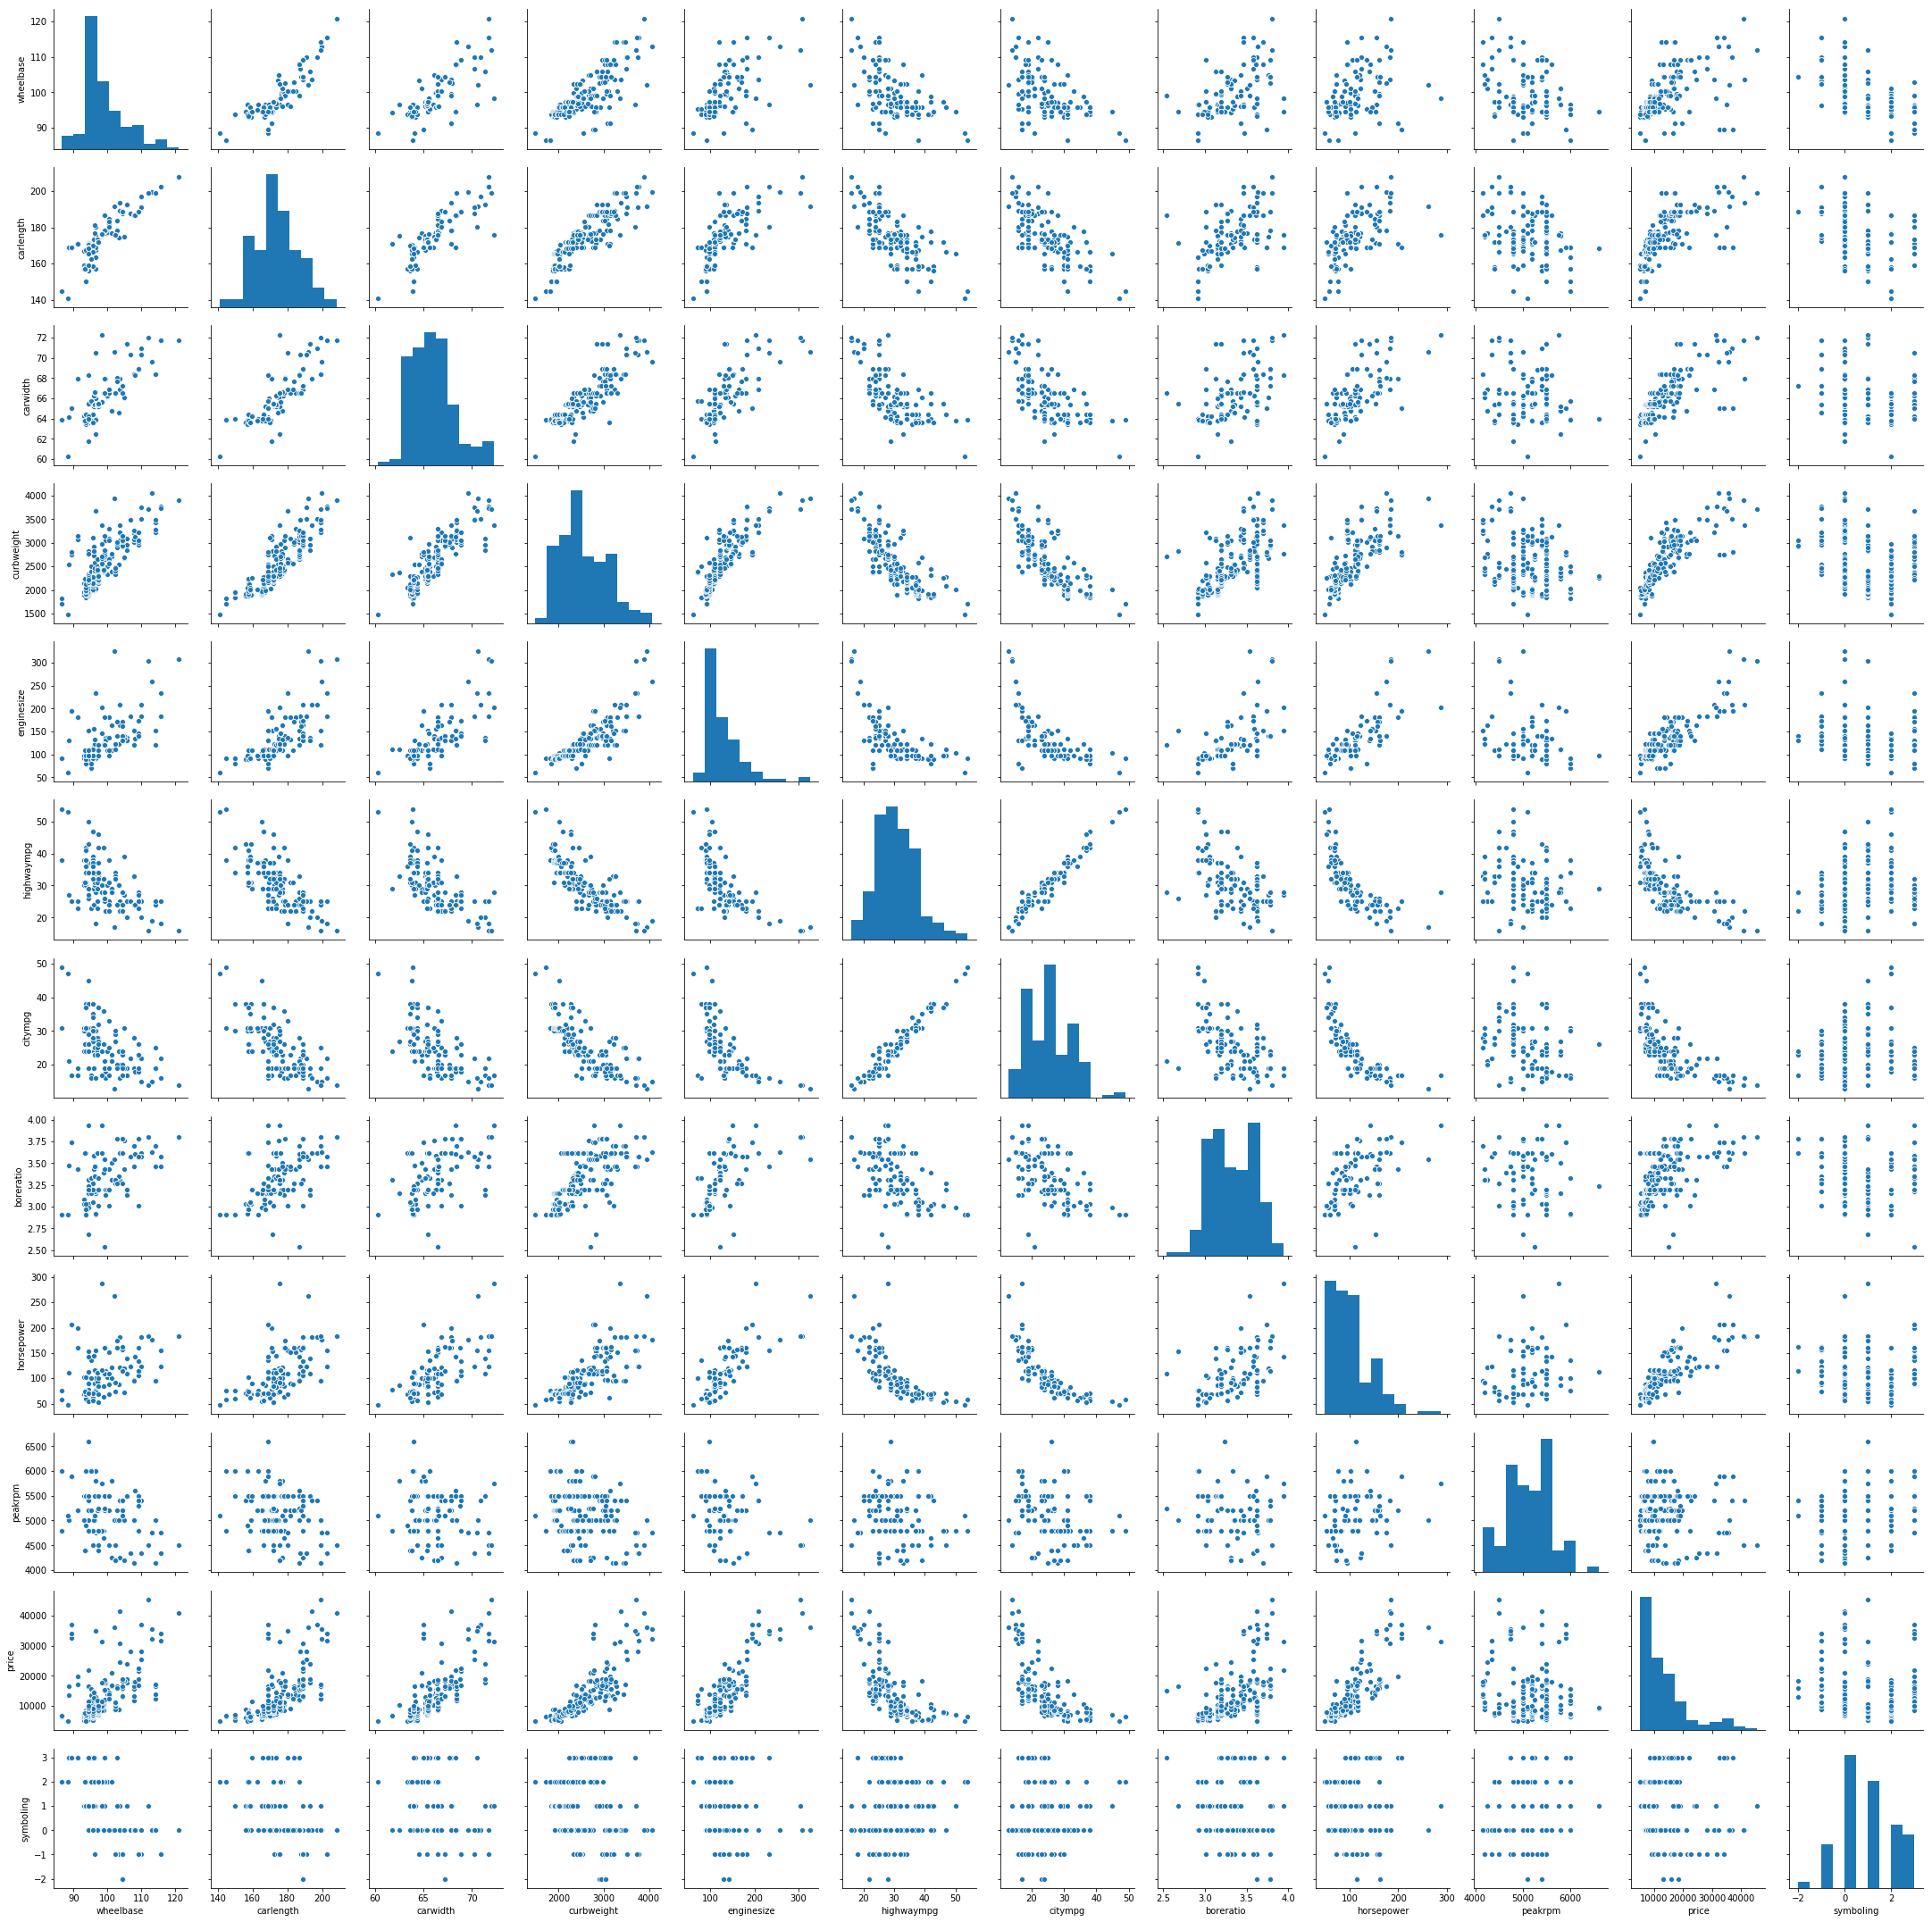

In [37]:
# make pair plot of all numeric data
plt.figure(figsize=(15, 15))
sns.pairplot(auto_data)
plt.show()

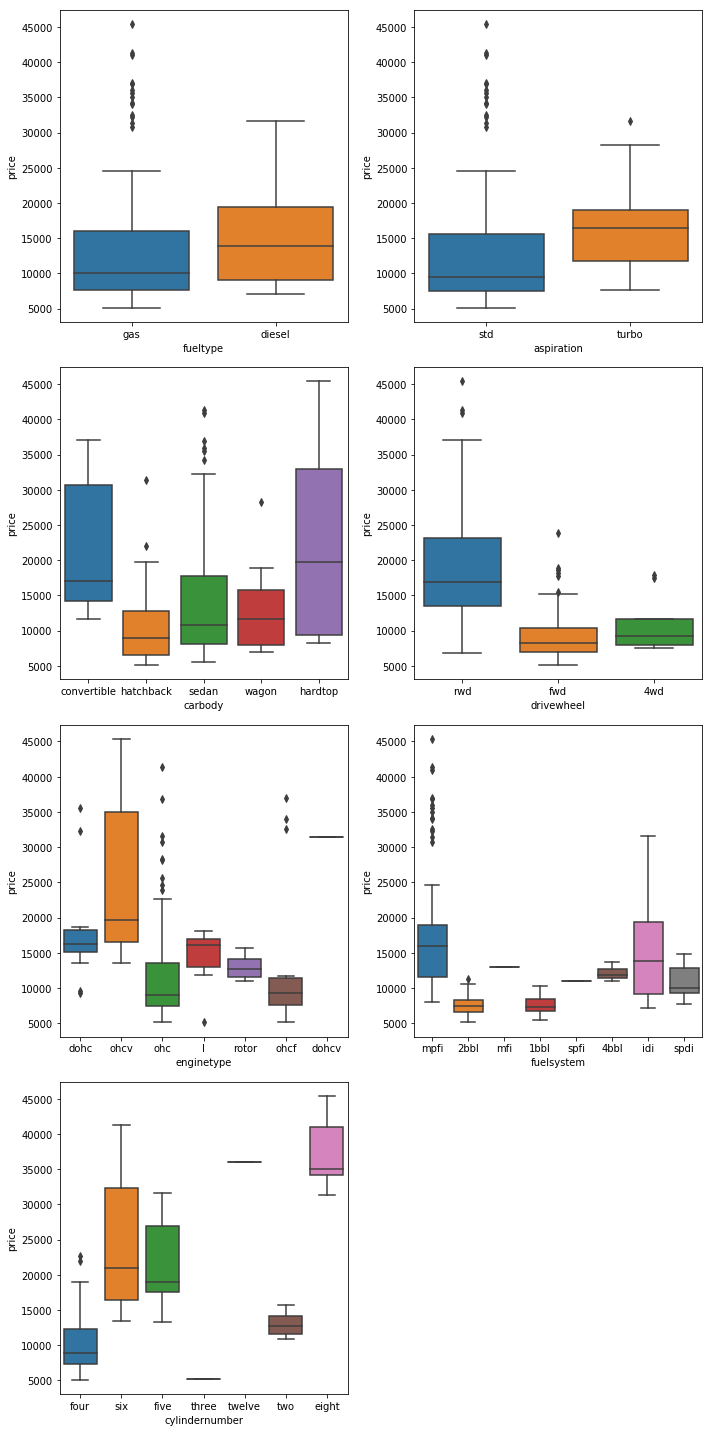

In [39]:
#lets make box plot on categorical variable
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto_data)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto_data)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = auto_data)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto_data)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto_data)
plt.subplot(4,2,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = auto_data)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto_data)
plt.tight_layout()
plt.show()

KeyError: "['carheight' 'stroke' 'compressionratio'] not in index"

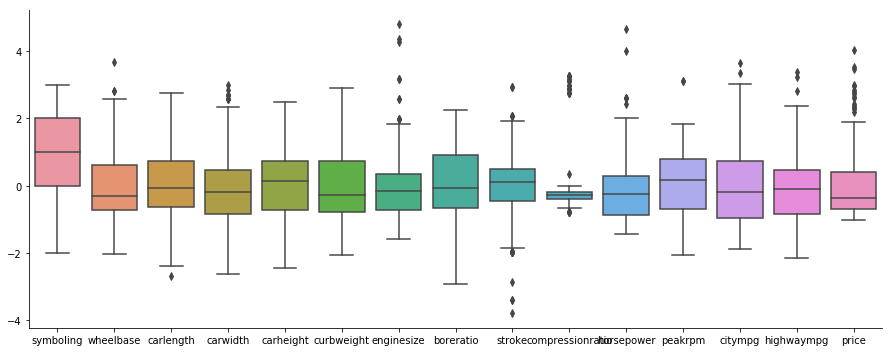

In [59]:
sns.catplot(data=car_data, kind='box',height=5, aspect=2.5)

In [51]:
# conver categorical features to numeric using hot encoding
#auto_data[['symboling','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']].head()

#auto_data[categoricial_feature_update_names].head()
#--Engineering Categorical Features approach is One Hot Encoding
auto_data = pd.get_dummies(auto_data, columns=categoricial_feature_update_names, drop_first = True)





In [52]:
# view new engineering features, where the categorical features are coded as binary
print(auto_data.head())

   wheelbase  carlength  carwidth  curbweight  enginesize  highwaympg  \
0       88.6      168.8      64.1        2548         130          27   
1       88.6      168.8      64.1        2548         130          27   
2       94.5      171.2      65.5        2823         152          26   
3       99.8      176.6      66.2        2337         109          30   
4       99.4      176.6      66.4        2824         136          22   

   citympg  boreratio  horsepower  peakrpm       ...         \
0       21       3.47         111     5000       ...          
1       21       3.47         111     5000       ...          
2       19       2.68         154     5000       ...          
3       24       3.19         102     5500       ...          
4       18       3.19         115     5500       ...          

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0                     0                      0                   0   
1                     0                   

In [53]:
auto_data.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [66]:
# Apply standard scaler method to numerical columns to make them scaling and normalized

pd.options.mode.chained_assignment = None  # default='warn'

#--scale or normalize our two numeric score-based attributes
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()   # we are making the object of StandardScaler

# fit scaler on numeric features
ss.fit(auto_data[numeric_feature_update_names])  # fit method learns the range of the data

# scale numeric features now
auto_data[numeric_feature_update_names] = ss.transform(auto_data[numeric_feature_update_names]) 
# transform method transforms the data. See the o/p. You would see a much reduced range.  

# view updated feature-set
print(auto_data)

     wheelbase  carlength  carwidth  curbweight  enginesize  highwaympg  \
0    -1.690772  -0.426521 -0.844782   -0.014566    0.074449   -0.546059   
1    -1.690772  -0.426521 -0.844782   -0.014566    0.074449   -0.546059   
2    -0.708596  -0.231513 -0.190566    0.514882    0.604046   -0.691627   
3     0.173698   0.207256  0.136542   -0.420797   -0.431076   -0.109354   
4     0.107110   0.207256  0.230001    0.516807    0.218885   -1.273900   
5     0.173698   0.264133  0.183272   -0.093502    0.218885   -0.837195   
6     1.172521   1.515437  2.566488    0.555313    0.218885   -0.837195   
7     1.172521   1.515437  2.566488    0.767092    0.218885   -0.837195   
8     1.172521   1.515437  2.566488    1.021227    0.098522   -1.565037   
9     0.123757   0.337262  0.930947    0.957693    0.098522   -1.273900   
10    0.406756   0.223507 -0.517674   -0.309132   -0.455148   -0.254922   
11    0.406756   0.223507 -0.517674   -0.309132   -0.455148   -0.254922   
12    0.406756   0.223507

In [67]:
# separate independant column
# Preparing the Data
# divide the data into i/p Features and o/p labels
X = auto_data.drop('price', axis=1) # dropping the target variable   
y = auto_data['price']  # Only taking the target variable

In [68]:
# Apply Linear regression
# dividing data into training and testing set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=10)  

# Training and Making Predictions
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print("intercept : ", regressor.intercept_)
coeff_df = pd.DataFrame(regressor.coef_ , X.columns, columns=['Coefficient'])  
coeff_df

intercept :  1.405578274255334


,Coefficient
wheelbase,1.636352e-01
carlength,-8.863638e-02
carwidth,1.692937e-01
curbweight,3.492852e-01
enginesize,9.946371e-02
highwaympg,7.925327e-02
citympg,-1.458015e-02
boreratio,3.953927e-02
horsepower,2.712161e-01
peakrpm,1.001983e-01


In [69]:
# Making Predictions
y_pred = regressor.predict(X_test)  

# compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
131,-0.424340,-0.284383
117,0.611505,0.679806
63,-0.311407,-0.114510
56,-0.179652,-0.124867
49,2.851338,3.931675
60,-0.600013,-0.178061
19,-0.876071,-0.835061
171,-0.216795,0.119450
163,-0.654848,-0.706324
203,1.153582,1.471134


In [70]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

#You can see that the value of root mean squared error is .44, which is lowerr than 10% of the mean value of price


Mean Absolute Error: 0.3522289722555847
Mean Squared Error: 0.2528696642260136
Root Mean Squared Error: 0.5028614761800844


In [71]:
# Apply Lasso (as nomber of features >10) otherwise we can apply Ridge

## getting the optimal value of alpha in case of Lasso regression 
## using the GridSearchCV algorithm:

# importing the Lasso class from linear_model 
from sklearn.linear_model import Lasso

# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV

# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Passing in a Lasso estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
lasso= GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10 )

# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',lasso.fit(X_test,y_test).best_params_)

# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the Lasso estimator is:',lasso.fit(X_test,y_test).best_score_)

The best value of alpha is: {'alpha': 0.01}
The best score for the Lasso estimator is: -0.151317927382066


In [73]:
feature_names = X.columns
feature_names

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'highwaympg', 'citympg', 'boreratio', 'horsepower', 'peakrpm',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

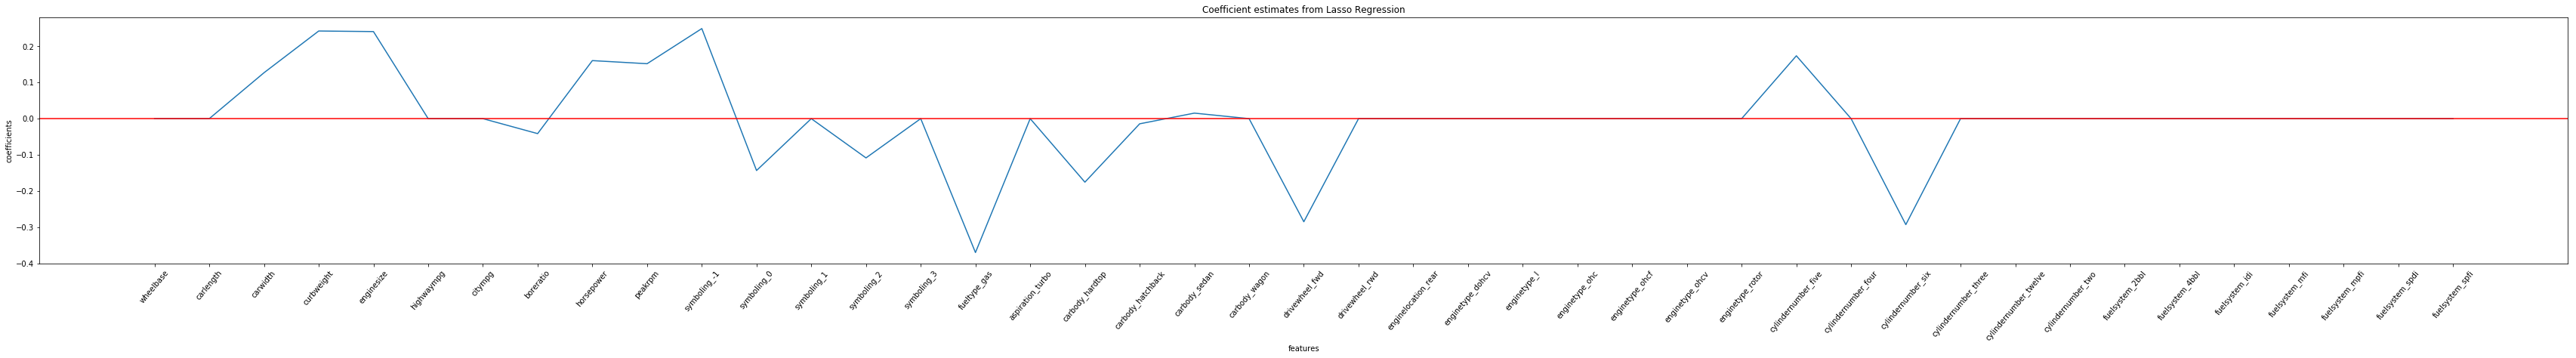

In [74]:

## visualize all the ten coefficient estimates for the Lasso regression model 

# Creating an object containing the best Lasso regression model
best_lasso_model= Lasso(alpha=0.01)

# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X_test,y_test).coef_

# plotting the coefficient estimates for all ten features
plt.figure(figsize=(60,6))
plt.plot(range(len(feature_names)),best_lasso_coeffs)

plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [78]:
# Making Predictions
y_pred = lasso.predict(X_test)  

# compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
131,-0.424340,-0.559403
117,0.611505,0.570840
63,-0.311407,-0.187244
56,-0.179652,-0.048740
49,2.851338,2.748710


In [76]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

#You can see that the applying Lasso regressor value of root mean squared error is less than he Normal LR model

Mean Absolute Error: 0.3522289722555847
Mean Squared Error: 0.2528696642260136
Root Mean Squared Error: 0.5028614761800844


In [77]:
score=r2_score(y_test,y_pred)
score

0.6892655885376684

### Apply OLS

In [78]:


#here const is represent as beta0.
X2 = sm.add_constant(X)

est = sm.OLS(y, X2)

est2 = est.fit()

print(est2.summary())

# this model we can see lot of features p value is gretar than 0.025 so fo those features we have to accept H0
# here prob(F-stat) is the p-value of F-stat which is less that means p-value<alpha where alpha=2.5% that is reject H0 
#that means this model accept

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     55.79
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           1.04e-76
Time:                        17:43:50   Log-Likelihood:                -13.076
No. Observations:                 205   AIC:                             110.2
Df Residuals:                     163   BIC:                             249.7
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.88

In [ ]:
from sklearn.ensemble import RandomForestRegressor